In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import feather
import datetime
from matplotlib_venn import venn2
pd.set_option('display.max_Columns', 100)

In [2]:
# cartlog = pd.read_csv('../inputs/cartlog.csv', dtype={
#     'session_id': 'int32',
#     'register_number': 'int32',
#     'date': str,
#     'hour': 'int32',
#     'spend_time': 'int32',
#     'display_action_id': 'int32',
#     'user_id': str,
#     'value_1': str,
#     'name_1': str,
#     'kind_1': str,
#     'number_1': 'float64',
#     'value_2': str,
#     'name_2': str,
#     'kind_2': str,
#     'number_2': 'float64',
#     'unit_price': 'float64',
#     'n_items': 'int32',
#     'is_payment': 'int32',
# })
# print('cartlog', cartlog.shape)
# cartlog['date_str'] =  cartlog['date']
# cartlog['date'] =  pd.to_datetime(cartlog['date'])
# cartlog.to_feather('../inputs/cartlog.f')
# meta.to_feather('../inputs/meta.f')
# product_master.to_feather('../inputs/product_master.f')
# user_master.to_feather('../inputs/user_master.f')

In [3]:
cartlog = pd.read_feather('../inputs/cartlog.f')
print('cartlog', cartlog.shape)
meta = pd.read_feather('../inputs/meta.f')
print('meta', meta.shape)
product_master = pd.read_feather('../inputs/product_master.f')
print('product_master', product_master.shape)
user_master = pd.read_feather('../inputs/user_master.f')
print('user_master', user_master.shape)

display_action_id = pd.read_csv('../inputs/display_action_id.csv')
print('display_action_id', display_action_id.shape)
test = pd.read_csv('../inputs/test.csv')
print('test', test.shape)
submission = pd.read_csv('../inputs/atmaCup#9__sample_submission.csv')
print('submission', submission.shape)

cartlog (14632775, 19)
meta (795936, 7)
product_master (1965937, 14)
user_master (40350, 3)
display_action_id (43, 4)
test (56486, 1)
submission (56486, 15)


In [4]:
display_action_id

,display_action_id,論理名,display_name,action_name
0,8,クーポン,クーポンPOP,クーポン発券
1,9,クーポン,クーポンPOP,クーポン発券(POP)
2,11,クーポン,クーポンPOP,自動表示
3,14,クーポン,クーポン一覧,カテゴリ選択
4,20,クーポン,クーポン一覧,クーポン発券
5,22,クーポン,クーポン一覧,クーポン発券(詳細)
6,23,クーポン,クーポン一覧,クーポン発券（詳細）
7,25,クーポン,クーポン一覧,スキャン
8,28,クーポン,クーポン詳細,クーポン発券
9,36,追加,バーコードがない商品,商品追加


In [5]:
train_log = cartlog[cartlog['date']<'2020-08-01']
test_log = cartlog[cartlog['date']>='2020-08-01']
print(train_log.shape)
print(test_log.shape)

(14299716, 19)
(333059, 19)


In [6]:
train_session = train_log['session_id'].unique()
test_session = test_log['session_id'].unique()
print(len(train_session))
print(len(test_session))

663708
56467


In [7]:
train_user = train_log['user_id'].unique()
test_user = test_log['user_id'].unique()
print(len(train_user))
print(len(test_user))

37092
11057


In [8]:
train_user_master = user_master[user_master['user_id'].isin(train_user)]
test_user_master = user_master[user_master['user_id'].isin(test_user)]
print(len(train_user_master))
print(len(test_user_master))

37092
11057


In [9]:
def draw_bar_plot(train, test, col, bins=10):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.hist([train[col], test[col]], bins=bins, label=['train', 'test'])
    ax.legend()
    ax.set_xlabel(col)

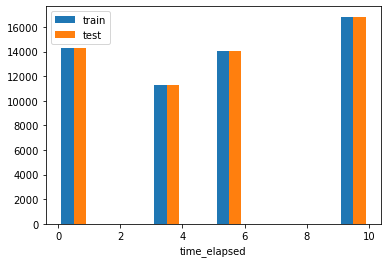

In [10]:
draw_bar_plot(meta, meta, 'time_elapsed', 10)

In [11]:
print(len(meta[meta['time_elapsed'].isnull()]))
print(len(meta[meta['time_elapsed'].notnull()]))
meta['time_elapsed'].value_counts()

739450
56486


10.0    16833
0.0     14277
5.0     14072
3.0     11304
Name: time_elapsed, dtype: int64

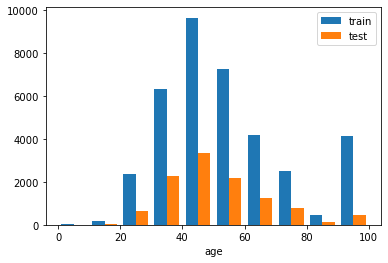

In [12]:
draw_bar_plot(train_user_master, test_user_master, 'age')

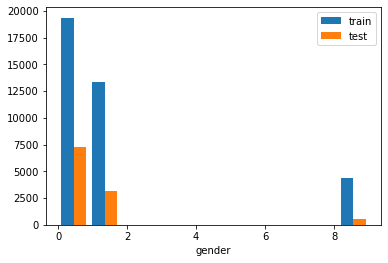

In [13]:
draw_bar_plot(train_user_master, test_user_master, 'gender')

In [14]:
def drawVenn(train, test, col):
    train_uniq = set(train[col].unique())
    test_uniq = set(test[col].unique())
    union = train_uniq | test_uniq
    intersection = train_uniq & test_uniq
    onlyTrain = train_uniq - intersection
    onlyTest = test_uniq - intersection

    print(col, len(union))
        
    if len(intersection) == 0:
        print('intersection = 0')
    elif len(intersection) < 100:
        print('intersection', intersection)
    
    if len(onlyTrain) == 0:
        print('onlyTrain = 0')
    elif len(onlyTrain) < 100:
        print('onlyTrain', onlyTrain)
    
    if len(onlyTest) == 0:
        print('onlyTest = 0')
    elif len(onlyTest) < 100:
        print('onlyTest', onlyTest)
        
    venn2(subsets=(train_uniq, test_uniq), set_labels=('train_'+col, 'test_'+col))

user_id 38536


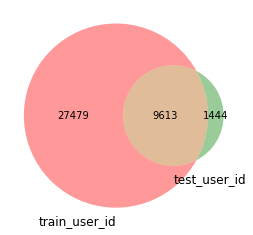

In [15]:
drawVenn(train_user_master, test_user_master, 'user_id')

In [16]:
product_master.head(10)

,JAN,商品名,部門CD,部門名,カテゴリCD,カテゴリ名,サブカテゴリCD,サブカテゴリ名,セグメントCD,セグメント名,サブセグメントCD,サブセグメント名,category_name,category_id
0,1,テナント商品1,98,未登録等,99,未登録等その他,99,未登録等その他,99,その他,99,その他,未登録等__未登録等その他,517
1,2,テナント商品2,98,未登録等,99,未登録等その他,99,未登録等その他,99,その他,99,その他,未登録等__未登録等その他,517
2,3,テナント商品3,98,未登録等,99,未登録等その他,99,未登録等その他,99,その他,99,その他,未登録等__未登録等その他,517
3,4,テナント商品4,98,未登録等,99,未登録等その他,99,未登録等その他,99,その他,99,その他,未登録等__未登録等その他,517
4,5,テナント商品5,98,未登録等,99,未登録等その他,99,未登録等その他,99,その他,99,その他,未登録等__未登録等その他,517
5,6,テナント商品6,98,未登録等,99,未登録等その他,99,未登録等その他,99,その他,99,その他,未登録等__未登録等その他,517
6,7,テナント商品7,98,未登録等,99,未登録等その他,99,未登録等その他,99,その他,99,その他,未登録等__未登録等その他,517
7,8,テナント商品8,98,未登録等,99,未登録等その他,99,未登録等その他,99,その他,99,その他,未登録等__未登録等その他,517
8,9,寿司(惣菜)_部門,49,米飯(麺),5,丼,2,丼・重,99,丼・重その他,98,設定なし,米飯(麺)__丼,620
9,10,テナント商品10,98,未登録等,99,未登録等その他,99,未登録等その他,99,その他,99,その他,未登録等__未登録等その他,517


In [17]:
print('all', cartlog['session_id'].nunique())
print('train', train_log['session_id'].nunique())
print('test', test_log['session_id'].nunique())
print('meta', meta['session_id'].nunique())

all 720175
train 663708
test 56467
meta 795936


session_id 795936
onlyTrain = 0


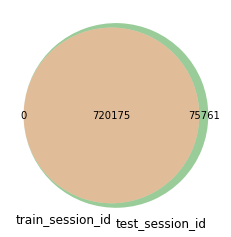

In [18]:
drawVenn(cartlog, meta, 'session_id')

In [19]:
cartlog['kind_1'].value_counts()

商品           10605757
クーポン           973712
会計             308696
キー             283597
カテゴリ           224390
バーコードスキャン      145876
UUID           101556
使用ポイント          35943
確認              23581
ブランドスイッチ        13933
レシピ              7960
スマホスキャン          4144
磁気スキャン            493
レコメンド             137
倍率ポイント              5
Name: kind_1, dtype: int64

In [20]:
pd.DataFrame(cartlog[cartlog['kind_1'] =='使用ポイント']['name_1'].value_counts()).head(10)

,name_1


In [21]:
pd.DataFrame(cartlog[cartlog['kind_1'] =='ブランドスイッチ']['name_1'].value_counts()).head(10)

,name_1
丸大食品キャンペーン実施中,7914
ドレッシングで野菜を食べよう♪,1927
衣料洗剤半額ポイントプレゼント！,1773
SUNAOスタンプラリー♪,583
【花王 年末お掃除スタンプラリー告知】ポップアップ,491
定番の組み合わせはこちら！,242
ONFEEL,237
メルティーキッス ブランドスイッチ,148
アトリックスハンドケアシリーズ半額ポイントプレゼント！アイランド,112
ボディウォッシュ半額ポイントプレゼント！,88


In [22]:
pd.DataFrame(cartlog[cartlog['kind_1'] =='カテゴリ']['name_1'].value_counts()).head(10)

,name_1
くだもの,21123
パン・乳製品,15224
そうざい,14682
お菓子,12993
鮮魚,8571
ソフトドリンク,7952
野菜・くだもの,7549
肉・ハム,7404
日用雑貨,7200
さかな,6542


In [23]:
coupon = pd.DataFrame(cartlog[cartlog['kind_1'] =='クーポン']['name_1'].value_counts())
coupon = coupon.reset_index()
print(len(coupon))

2127


In [59]:
coupon_name = {
    'ml', '水', '乳', '茶', 'ポテ', 'ウォーター', 'カップ', '無糖', '柿の種', 'サブレ', 'バター', 'コーヒー', 'ネスレ',  'ミルク',
    'チョコ', 'コーラ', 'チップス', 'バニラ', '炭酸水', '天然水', 'ビール', '飴', 'ラーメン', 'コンソメ', 'ホット', 'パック', 'プリン',
    'キャラメル', 'カルビー', 'アルフォート', 'フルグラ', 'ゼリー', 'アソート', 'キットカット', 'ドデカミン', '伊右衛門',
}

In [60]:
for name in coupon_name:
    coupon.loc[coupon['index'].str.contains(name), 'coupon'] = name

In [61]:
coupon[coupon['coupon'].isnull()].head(60)

,index,name_1,coupon
48,除菌ウェットティッシュ100枚,3700,NaN
49,箱なしティッシュ５P,3591,NaN
50,トライアルアルカリ電池 単三4P,3514,NaN
102,国産大豆３Ｐ,2224,NaN
104,サンボンベ3本,2207,NaN
119,かく天,1875,NaN
122,スイカ(カット・ブロック・1玉),1808,NaN
124,ｴﾘｴｰﾙ超吸収ｷｯﾁﾝﾀｵﾙ4R 50ｶｯﾄ,1803,NaN
130,ワイドハイター-EXパワー-つめかえ用-４８０ＭＬ,1731,NaN
134,紙コップ５０P,1707,NaN


In [6]:
product_master['JAN'] = product_master['JAN'].astype(str)

In [7]:
user_master.head(10)

,user_id,age,gender
0,None,NaN,NaN
1,222BJXjf8z6YfvHVLvjbhK,40.0,0.0
2,2285uFEmqQNtttDNKPc7Zh,30.0,1.0
3,22CVr2MdbLSkbXycnChGQd,30.0,0.0
4,22KGbCvUqtWPXFsdeCWnrQ,70.0,9.0
5,22Ls5VMp7g4mNGfTn2QQ2c,30.0,0.0
6,22MpASPxvRcLGY2JxVxFys,80.0,0.0
7,22PyLBDmbwt4LQiVrqJhLR,50.0,0.0
8,22TYUSKRFh38QDRJ962YrR,20.0,1.0
9,22U5ViYaLZvsgUdPHcYZzu,50.0,0.0


In [9]:
def create_payment(input_df: pd.DataFrame) -> pd.DataFrame:
    """
    ログデータから session_id / JAN ごとの購買情報に変換します.

    Args:
        input_df:
            レジカートログデータ

    Returns:
        session_id, JAN, n_items (合計購買数) の DataFrame
    """

    # 購買情報は商品のものだけ.
    out_df = input_df[input_df['kind_1'] == '商品'].reset_index(drop=True)

    out_df = out_df.groupby(['session_id', 'value_1'])['n_items'].sum().reset_index()
    out_df = out_df.rename(columns={
        'value_1': 'JAN'
    })
    return out_df

In [65]:
item_count = cartlog[cartlog['kind_1'] == '商品'].groupby(['session_id', 'value_1'])['n_items'].sum().reset_index()
item_count = item_count.rename(columns={'value_1': 'JAN'})
item_count

,session_id,JAN,n_items
0,0,4522646330991,0
1,0,4522646695663,1
2,0,4522646695670,1
3,0,4522646716641,1
4,0,4522646719765,1
...,...,...,...
8539413,795932,4902881000543,1
8539414,795932,4902881072311,1
8539415,795932,4935850351926,1
8539416,795933,4901301349491,1


In [11]:
session_item_product = pd.merge(session_item, product_master, on='JAN', how='left')

In [12]:
session_item_product[session_item_product['session_id']==663707]

,session_id,JAN,n_items,商品名,部門CD,部門名,カテゴリCD,カテゴリ名,サブカテゴリCD,サブカテゴリ名,セグメントCD,セグメント名,サブセグメントCD,サブセグメント名,category_name,category_id
8336655,663707,2510689000000,1,フライドチキン,1.0,温惣菜,1.0,唐揚げ,1.0,唐揚げ（畜産）,4.0,フライドチキン,98.0,設定なし,温惣菜__唐揚げ,565.0
8336656,663707,2540664000000,1,手作り唐揚げ（塩）ゆず塩付 小,1.0,温惣菜,1.0,唐揚げ,1.0,唐揚げ（畜産）,2.0,鶏唐揚（手作り）,98.0,設定なし,温惣菜__唐揚げ,565.0
8336657,663707,2540936000000,1,ポテサラちくわ天,1.0,温惣菜,4.0,天ぷら,1.0,天ぷら(海鮮）,5.0,ちくわ天,98.0,設定なし,温惣菜__天ぷら,566.0
8336658,663707,4522646330991,0,レジ袋３円,185.0,レジ袋,1.0,レジ袋,1.0,レジ袋,99.0,その他,99.0,その他,レジ袋__レジ袋,240.0
8336659,663707,4901773010011,1,焼豚ラーメン,84.0,麺類,2.0,カップ麺,1.0,主食サイズ,2.0,どんぶり型,1.0,ラーメン,麺類__カップ麺,768.0
8336660,663707,4901990360098,1,マルちゃんQTTAカレー86g,84.0,麺類,2.0,カップ麺,1.0,主食サイズ,1.0,たて型,1.0,ラーメン,麺類__カップ麺,768.0
8336661,663707,4903380382376,1,プチチョコ,91.0,ホールセールパン,1.0,食卓パン(ホールセールパン),2.0,ファミリー向け（袋物）,2.0,ファミリー向け,14.0,素材練込,ホールセールパン__食卓パン(ホールセールパン),210.0


In [13]:
x = cartlog.groupby('session_id')['is_payment'].sum()
payment_sessions = x[x > 0].index

In [14]:
idx = cartlog['session_id'].isin(payment_sessions)
payment_log_df = cartlog[idx].reset_index(drop=True)

In [15]:
payment_log_df.tail(10)

,session_id,register_number,date,hour,spend_time,display_action_id,user_id,value_1,name_1,kind_1,number_1,value_2,name_2,kind_2,number_2,unit_price,n_items,is_payment,date_str
13714196,663707,2002,2020-07-31,23,0,137,None,2960050332842,スキャンデータ,バーコードスキャン,NaN,None,None,None,NaN,NaN,0,0,2020-07-31
13714197,663707,2002,2020-07-31,23,13,209,VVksfUynATdP5FVTmUJrLE,2540936000000,ポテサラちくわ天,商品,1.0,None,None,None,NaN,129.0,1,0,2020-07-31
13714198,663707,2002,2020-07-31,23,18,209,VVksfUynATdP5FVTmUJrLE,2510689000000,フライドチキン,商品,1.0,None,None,None,NaN,99.0,1,0,2020-07-31
13714199,663707,2002,2020-07-31,23,25,209,VVksfUynATdP5FVTmUJrLE,2540664000000,手作り唐揚げ（塩）ゆず塩,商品,1.0,None,None,None,NaN,173.0,1,0,2020-07-31
13714200,663707,2002,2020-07-31,23,29,209,VVksfUynATdP5FVTmUJrLE,4901773010011,焼豚ラーメン,商品,1.0,None,None,None,NaN,105.0,1,0,2020-07-31
13714201,663707,2002,2020-07-31,23,40,209,VVksfUynATdP5FVTmUJrLE,4901990360098,マルちゃんQTTAカレー86g,商品,1.0,None,None,None,NaN,109.0,1,0,2020-07-31
13714202,663707,2002,2020-07-31,23,46,209,VVksfUynATdP5FVTmUJrLE,4903380382376,プチチョコ,商品,1.0,None,None,None,NaN,99.0,1,0,2020-07-31
13714203,663707,2002,2020-07-31,23,50,199,VVksfUynATdP5FVTmUJrLE,None,None,None,NaN,None,None,None,NaN,NaN,0,0,2020-07-31
13714204,663707,2002,2020-07-31,23,54,78,VVksfUynATdP5FVTmUJrLE,4522646330991,レジ袋,商品,1.0,None,None,None,NaN,NaN,0,0,2020-07-31
13714205,663707,2002,2020-07-31,23,57,105,VVksfUynATdP5FVTmUJrLE,None,None,None,NaN,None,None,None,NaN,NaN,0,1,2020-07-31
